# Import

In [70]:
import sys
nephosemdir = "D:/OneDrive - KU Leuven/KUL/nephosem"
tokens_coordinates_dir = 'tokens_coordinates'
soc_analysis_dir = 'soc_analysis'

sys.path.append(nephosemdir)
sys.path.append(tokens_coordinates_dir)
sys.path.append(soc_analysis_dir)

mydir = f"./"

In [ ]:
# tokens_coordinates
import get_model_data
import get_token_ids
import importlib
# Import the module before reloading
importlib.reload(get_token_ids)
importlib.reload(get_model_data)

In [72]:
# Nephosem
from nephosem import ConfigLoader, TypeTokenMatrix
conf = ConfigLoader()
settings = conf.update_config('config.ini')

In [125]:
# soc_analysis
import soc_analysis
import POS_submtx
import importlib
# Import the module before reloading
importlib.reload(soc_analysis)
importlib.reload(POS_submtx)

<module 'POS_submtx' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\soc_analysis\\POS_submtx.py'>

In [126]:
analyser = soc_analysis.SOCAnalyser()

token = 'time_final_no_det'
model = 'time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA'
input_folder = './input/'
output_folder = './output/'

# Get the coordinates of the tokens

In [ ]:
# Get the coordinates, senses of the tokens of the model.
get_model_data.get_model_data(token, model, input_folder)

In [ ]:
# Visualisation to get the token ids
get_token_ids.get_token_ids(token, model, input_folder)

# Get the sub-matrix of the SOC matrix

In [131]:
# List of tokens copied from the token_coordinate
token_list = ['time/NN/Encow_sample_4340/41', 'time/NN/Encow_sample_27616/24', 'time/NN/Encow_sample_20274/16', 'time/NN/Encow_sample_31654/62', 'time/NN/Encow_sample_20185/38', 'time/NN/Encow_sample_2091/31', 'time/NN/Encow_sample_19697/12', 'time/NN/Encow_sample_2958/92', 'time/NN/Encow_sample_28176/41', 'time/NN/Encow_sample_29404/44', 'time/NN/Encow_sample_23189/18', 'time/NN/Encow_sample_3829/43', 'time/NN/Encow_sample_11344/13', 'time/NN/Encow_sample_28496/50', 'time/NN/Encow_sample_1117/53', 'time/NN/Encow_sample_232/29', 'time/NN/Encow_sample_22361/83', 'time/NN/Encow_sample_30912/54', 'time/NN/Encow_sample_1840/58', 'time/NN/Encow_sample_3400/19', 'time/NN/Encow_sample_10232/58', 'time/NN/Encow_sample_21435/113', 'time/NN/Encow_sample_19352/39', 'time/NN/Encow_sample_20378/46', 'time/NN/Encow_sample_29404/48', 'time/NN/Encow_sample_31249/26', 'time/NN/Encow_sample_30196/39', 'time/NN/Encow_sample_17271/14']

# Name of the sense/region
sense = 'time_3'

In [132]:
# Get the full SOC matrix
model_file = f'{input_folder}{model}.tcmx.soc.pac'
model_mtx = TypeTokenMatrix.load(model_file) # opens a matrix

# Get the submatrix of only the tokens under investigation
subset_rows = model_mtx.submatrix(row = token_list)
subset_rows.to_csv(f'{input_folder}{sense}_SOCs.csv', sep=',')

In [133]:
# List of POS tags
POS_list = ['/N']
SenSOC_file = 'input/time_3_SOCs.csv'
sub_SenSOC = 'time_3_N'

# Get the submatrix of only the POS tags
POS_submtx.get_POS_submtx(SenSOC_file, sub_SenSOC, POS_list, input_folder)

Filtered SOC matrix saved to: ./input/time_3_N_SOCs.csv


# SOC Analysis

Elbow index: 65
Elbow SOC: expansion/NN (Association Score: 0.0323648690783453)


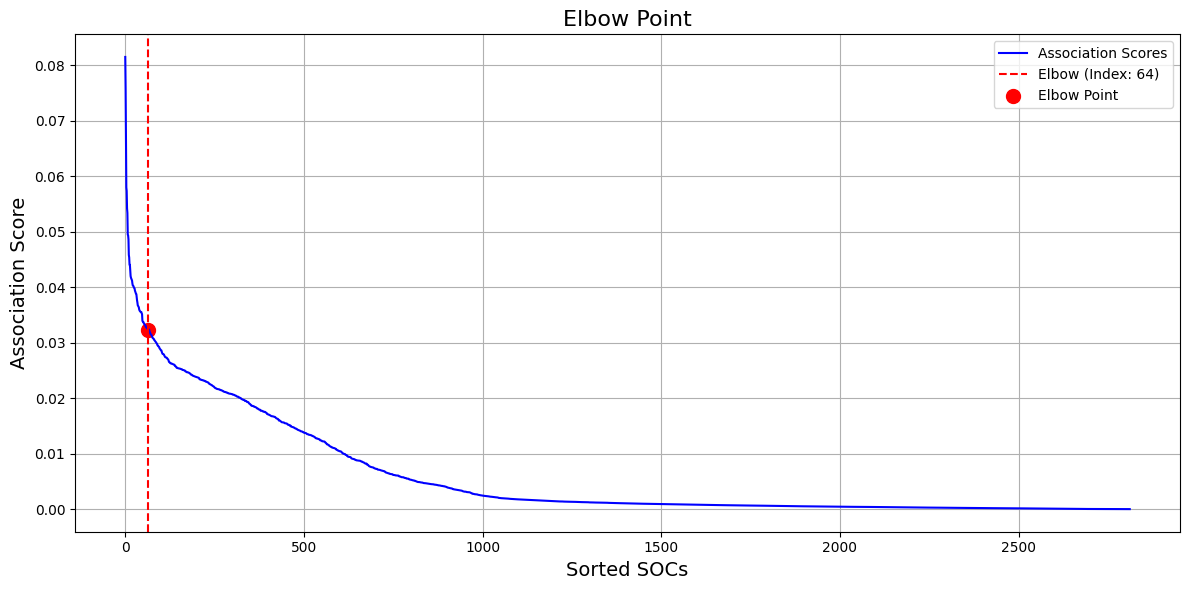

In [134]:
# Choose the submatrix
sub_SenSOC = 'time_3_N'
sub_senSOC_file = 'input/time_3_N_SOCs.csv'

# Find the elbow
analyser.elbow_finder(sense, sub_senSOC_file)

In [135]:
# Top n SOCs
n = 65
analyser.soc_dist_vis(n, sub_SenSOC, output_folder)

Top 65 SOCs extracted and saved to: ./output/top_65-time_3_N_SOCs.csv


In [ ]:
# Get the raw context for the tokens
analyser.get_context(token, sense, token_list, input_folder, output_folder)